# Read c3D files: output xarray 

> Marcos Duarte  
> [Laboratory of Biomechanics and Motor Control](http://demotu.org/)  
> Federal University of ABC, Brazil

Let's use the [EZC3D](https://github.com/pyomeca/ezc3d) library to open c3d files.  

> [EZC3D](https://github.com/pyomeca/ezc3d) is an easy to use reader, modifier and writer for C3D format files.

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-setup" data-toc-modified-id="Python-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python setup</a></span></li><li><span><a href="#Using-EZC3D-directly-and-return-an-ezc3d-object" data-toc-modified-id="Using-EZC3D-directly-and-return-an-ezc3d-object-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using EZC3D directly and return an ezc3d object</a></span></li><li><span><a href="#Using-EZC3D-directly-and-return-an-ezc3d-swig-object" data-toc-modified-id="Using-EZC3D-directly-and-return-an-ezc3d-swig-object-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Using EZC3D directly and return an ezc3d swig object</a></span><ul class="toc-item"><li><span><a href="#Platform-data" data-toc-modified-id="Platform-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Platform data</a></span></li></ul></li><li><span><a href="#Using-EZC3D-indirectly-via-custom-functions-and-return-a-xarray-object" data-toc-modified-id="Using-EZC3D-indirectly-via-custom-functions-and-return-a-xarray-object-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Using EZC3D indirectly via custom functions and return a xarray object</a></span></li></ul></div>

## Python setup

In [11]:
import sys, os
from pathlib import Path  # file and directory paths in Python
import glob  # Unix style pathname pattern expansion
from datetime import datetime
import numpy as np  # large, multi-dimensional numeric arrays and matrices
import pandas as pd  # labelled tables with numeric and string data
import matplotlib  # data visualization
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # data visualization
import xarray as xr  # labelled multi-dimensional arrays
from tqdm.notebook import tqdm  # progress bar
from IPython.display import display, Math, Latex  # IPython formatting
import scipy as sp  # collection of mathematical algorithms and convenience functions built on NumPy
sys.path.insert(1, r'./../functions')
import ezc3d
import read_c3d_xr
if os.getenv("COLAB_RELEASE_TAG"):
    !pip install -q ipywidgets  # Jupyter Widgets
    from google.colab import output
    output.enable_custom_widget_manager()

print(f'Python {sys.version} on {sys.platform}', f' numpy {np.__version__}',
      f' scipy {sp.__version__}', f' pandas {pd.__version__}', f' read_c3d_xr {read_c3d_xr.__version__}',
      datetime.now().strftime("%d/%m/%Y %H:%M:%S"), sep='\n')

Python 3.12.7 | packaged by conda-forge | (main, Oct  4 2024, 16:05:46) [GCC 13.3.0] on linux
 numpy 2.1.2
 scipy 1.14.1
 pandas 2.2.3
 read_c3d_xr 0.0.2
22/10/2024 22:06:59


## Using EZC3D directly and return an ezc3d object

In [43]:
path2 = Path('./../data/RonaldoJane/')
fname = path2 / 'S_S02_T00_2.c3d'
fname = fname.as_posix()
print(fname)
x = ezc3d.c3d(fname)
read_c3d_xr.printdict(x)

../data/RonaldoJane/S_S02_T00_2.c3d
keys:  ['header', 'parameters', 'data'] 
['header']:
 keys:  ['points', 'analogs', 'rotations', 'events'] 
 ['header']['points']:
  keys:  ['size', 'frame_rate', 'first_frame', 'last_frame'] 
  ['header']['points']['size']:
  174
  ['header']['points']['frame_rate']:
  100.0
  ['header']['points']['first_frame']:
  139
  ['header']['points']['last_frame']:
  364
 ['header']['analogs']:
  keys:  ['size', 'frame_rate', 'first_frame', 'last_frame'] 
  ['header']['analogs']['size']:
  6
  ['header']['analogs']['frame_rate']:
  1000.0
  ['header']['analogs']['first_frame']:
  1390
  ['header']['analogs']['last_frame']:
  3649
 ['header']['rotations']:
  keys:  ['size', 'frame_rate', 'first_frame', 'last_frame'] 
  ['header']['rotations']['size']:
  0
  ['header']['rotations']['frame_rate']:
  0.0
  ['header']['rotations']['first_frame']:
  0
  ['header']['rotations']['last_frame']:
  -1
 ['header']['events']:
  keys:  ['size', 'events_time', 'events_label

##  Using EZC3D directly and return an ezc3d swig object

In [44]:
c3d = ezc3d.c3d(fname).c3d_swig

In [45]:
all_labels = c3d.pointNames()
all_labels

('PELO',
 'PELA',
 'PELL',
 'PELP',
 'LFEO',
 'LFEA',
 'LFEL',
 'LFEP',
 'LTIO',
 'LTIA',
 'LTIL',
 'LTIP',
 'LFOO',
 'LFOA',
 'LFOL',
 'LFOP',
 'RFEO',
 'RFEA',
 'RFEL',
 'RFEP',
 'RTIO',
 'RTIA',
 'RTIL',
 'RTIP',
 'RFOO',
 'RFOA',
 'RFOL',
 'RFOP',
 'LTOO',
 'LTOA',
 'LTOL',
 'LTOP',
 'RTOO',
 'RTOA',
 'RTOL',
 'RTOP',
 'LASI',
 'RASI',
 'LPSI',
 'RPSI',
 'LTHI',
 'LKNE',
 'LHFB',
 'LTUB',
 'LTIB',
 'LSHN',
 'LANK',
 'LCPG',
 'LHEE',
 'LSTL',
 'LP1M',
 'LHLX',
 'LTOE',
 'LD5M',
 'LP5M',
 'LLCA',
 'RTHI',
 'RKNE',
 'RHFB',
 'RTUB',
 'RTIB',
 'RSHN',
 'RANK',
 'RCPG',
 'RHEE',
 'RSTL',
 'RP1M',
 'RHLX',
 'RTOE',
 'RD5M',
 'RP5M',
 'RLCA',
 '*72',
 '*73',
 'LArchHeightIndex',
 'RArchHeightIndex',
 'LHipAngles',
 'LKneeAngles',
 'LAbsAnkleAngle',
 'LAnkleAngles',
 'RHipAngles',
 'RKneeAngles',
 'RAnkleAngles',
 'RAbsAnkleAngle',
 'LPelvisAngles',
 'RPelvisAngles',
 'LFootProgressAngles',
 'RFootProgressAngles',
 'LFETBA',
 'LTIBA',
 'LHFTFL',
 'LHFTBA',
 'LFFTBA',
 'LFFHFA',
 'LHXFFA',


### Platform data

In [46]:
c3d = ezc3d.c3d(fname, extract_forceplat_data=True)
pf_0 = c3d['data']['platform'][0]
pf_0['unit_force']          # Units of forces
pf_0['unit_moment']         # Units of moments
pf_0['unit_position']       # Units of center of pressure

pf_0['cal_matrix']          # Calibration matrix
pf_0['corners']             # Position of the corners
pf_0['origin']              # Position of the origin

pf_0['force']               # Force data
pf_0['moment']              # Moment data
pf_0['center_of_pressure']  # Center of pressure data
pf_0['Tz']                  # Moment at center of pressure data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [47]:
pf_0['unit_position']

'mm'

In [48]:
pf_0['origin']

array([  1.05299997,   0.95700002, -44.10499954])

In [49]:
pf_0['corners'].T

array([[ 4.63999969e+02, -3.07996706e-05,  0.00000000e+00],
       [-3.37203310e-05,  3.07996706e-05,  0.00000000e+00],
       [ 3.37203310e-05,  5.08000061e+02,  0.00000000e+00],
       [ 4.64000031e+02,  5.08000000e+02,  0.00000000e+00]])

In [50]:
pf_0['moment'][:, 200]

array([0., 0., 0.])

In [51]:
pf_0['Tz'][:, 200]

array([nan, nan, nan])

In [52]:
pf_0['center_of_pressure'][:, 200]

array([nan, nan, nan])

## Using EZC3D indirectly via custom functions and return a xarray object

In [53]:
prm = read_c3d_xr.get_parameters(fname)
prm

{'filename': 'S_S02_T00_2',
 'mass': np.float64(67.0),
 'height': np.float64(1.58),
 'LL': {'L': np.float64(0.809), 'R': np.float64(0.809)},
 'FL': {'L': np.float64(0.185), 'R': np.float64(0.184)},
 'units_all': {'Point': 'mm',
  'Mass': 'kg',
  'Length': 'm',
  'Time': 's',
  'g': 9.80665,
  'Angle': 'deg',
  'Force': 'N',
  'Moment': 'Nmm',
  'Power': 'W',
  'scale': 0.001,
  'Cadence': 'steps/min',
  'Walking Speed': 'm/s',
  'Stride Time': 's',
  'Foot Off': '%',
  'Stride Length': 'm'},
 'rates': {'p': 100.0, 'a': 1000.0},
 'frames': {'p': [139, 364], 'a': [1390, 3640]},
 'events': {'0': [np.float64(1.76), 'RFO'],
  '1': [np.float64(3.15), 'RFS'],
  'LFS': [nan],
  'LFO': [nan],
  'RFS': array([2.134, 3.15 ]),
  'RFO': array([1.76 , 2.766])},
 'Cadence': np.float64(118.11),
 'Walking Speed': np.float64(1.167),
 'Stride Time': np.float64(1.016),
 'Foot Off': np.float64(62.205),
 'Stride Length': np.float64(1.186)}

In [54]:
data = read_c3d_xr.read_c3d(fname, var='POINT', prm=prm)
data

<xarray.DataArray 'Point' (Time: 226, Var: 174, Axis: 3)> Size: 944kB
array([[[           nan,            nan,            nan],
        [           nan,            nan,            nan],
        [           nan,            nan,            nan],
        ...,
        [           nan,            nan,            nan],
        [           nan,            nan,            nan],
        [           nan,            nan,            nan]],

       [[           nan,            nan,            nan],
        [           nan,            nan,            nan],
        [           nan,            nan,            nan],
        ...,
        [           nan,            nan,            nan],
        [           nan,            nan,            nan],
        [           nan,            nan,            nan]],

       [[  206.03497314,  1275.39343262,   818.41461182],
        [  199.59957886,  1160.16333008,   816.28503418],
        [  321.28057861,  1268.94116211,   819.27947998],
        ...,
...
        ...,
        [  104.42133331, -1115.29602051,    76.28819275],
        [  144.04093933, -1140.69482422,    23.51332855],
        [   82.77619934, -1171.95166016,    39.93405914]],

       [[  136.84667969, -1162.18457031,   803.23638916],
        [  128.05741882, -1277.27087402,   801.8772583 ],
        [  251.89530945, -1171.00805664,   806.3807373 ],
        ...,
        [  104.38724518, -1115.1652832 ,    76.24653625],
        [  144.06199646, -1140.55395508,    23.50820732],
        [   82.79936218, -1171.83789062,    39.88489532]],

       [[  138.04603577, -1172.29309082,   801.64422607],
        [  128.95388794, -1287.35656738,   800.35778809],
        [  253.06689453, -1181.41870117,   804.93981934],
        ...,
        [  104.2789917 , -1115.06677246,    76.21781921],
        [  144.08409119, -1140.37854004,    23.54088402],
        [   82.78292084, -1171.68859863,    39.72281647]]])
Coordinates:
  * Time     (Time) float64 2kB 1.39 1.4 1.41 1.42 1.43 ... 3.61 3.62 3.63 3.64
  * Var      (Var) <U21 15kB 'PELO' 'PELA' 'PELL' ... 'RHLX1' 'RHLX2' 'RHLX3'
  * Axis     (Axis) <U2 24B 'ML' 'AP' 'VT'
Attributes: (12/15)
    units:          mm
    filename:       S_S02_T00_2
    mass:           67.0
    height:         1.58
    LL:             {'L': np.float64(0.809), 'R': np.float64(0.809)}
    FL:             {'L': np.float64(0.185), 'R': np.float64(0.184)}
    ...             ...
    events:         {'0': [np.float64(1.76), 'RFO'], '1': [np.float64(3.15), ...
    Cadence:        118.11
    Walking Speed:  1.167
    Stride Time:    1.016
    Foot Off:       62.205
    Stride Length:  1.186

In [55]:
data = read_c3d_xr.read_c3d(fname, var='ANALOG', prm=prm)
data

<xarray.DataArray 'ANALOG' (Time: 2260, Var: 6)> Size: 108kB
array([[-0., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0.],
       ...,
       [-0., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0.]])
Coordinates:
  * Time     (Time) float64 18kB 1.39 1.391 1.392 1.393 ... 3.647 3.648 3.649
  * Var      (Var) <U10 240B 'Force.Fx1' 'Force.Fy1' ... 'Moment.Mz1'
Attributes: (12/15)
    units:          a.u.
    filename:       S_S02_T00_2
    mass:           67.0
    height:         1.58
    LL:             {'L': np.float64(0.809), 'R': np.float64(0.809)}
    FL:             {'L': np.float64(0.185), 'R': np.float64(0.184)}
    ...             ...
    events:         {'0': [np.float64(1.76), 'RFO'], '1': [np.float64(3.15), ...
    Cadence:        118.11
    Walking Speed:  1.167
    Stride Time:    1.016
    Foot Off:       62.205
    Stride Length:  1.186

In [56]:
data = read_c3d_xr.read_c3d(fname, var='GRF', prm=prm)
data

<xarray.DataArray 'GRF' (Time: 2260, Var: 1, Axis: 3)> Size: 54kB
array([[[-0., -0.,  0.]],

       [[-0., -0.,  0.]],

       [[-0., -0.,  0.]],

       ...,

       [[-0., -0.,  0.]],

       [[-0., -0.,  0.]],

       [[-0., -0.,  0.]]])
Coordinates:
  * Time     (Time) float64 18kB 1.39 1.391 1.392 1.393 ... 3.647 3.648 3.649
  * Var      (Var) <U6 24B 'Force1'
  * Axis     (Axis) <U2 24B 'ML' 'AP' 'VT'
Attributes: (12/15)
    units:          N
    filename:       S_S02_T00_2
    mass:           67.0
    height:         1.58
    LL:             {'L': np.float64(0.809), 'R': np.float64(0.809)}
    FL:             {'L': np.float64(0.185), 'R': np.float64(0.184)}
    ...             ...
    events:         {'0': [np.float64(1.76), 'RFO'], '1': [np.float64(3.15), ...
    Cadence:        118.11
    Walking Speed:  1.167
    Stride Time:    1.016
    Foot Off:       62.205
    Stride Length:  1.186

In [57]:
data.Time

<xarray.DataArray 'Time' (Time: 2260)> Size: 18kB
array([1.39 , 1.391, 1.392, ..., 3.647, 3.648, 3.649])
Coordinates:
  * Time     (Time) float64 18kB 1.39 1.391 1.392 1.393 ... 3.647 3.648 3.649
Attributes:
    units:    s
    rate:     1000.0
    events:   {'0': [np.float64(1.76), 'RFO'], '1': [np.float64(3.15), 'RFS']...
    side:     R

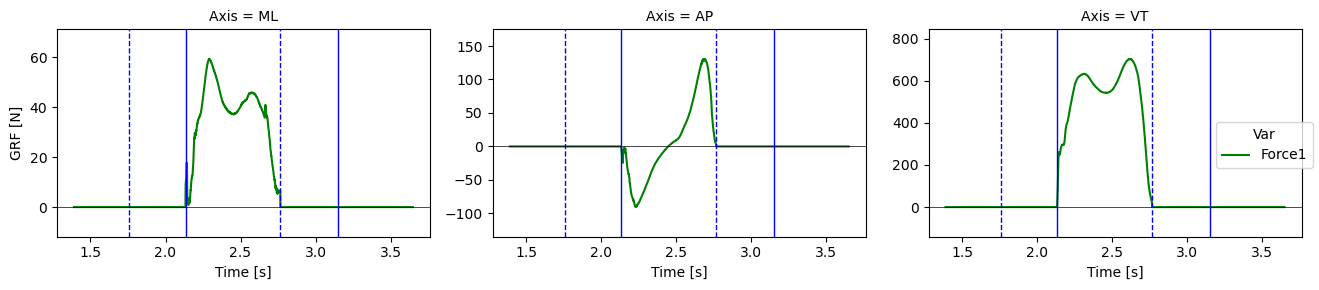

In [58]:
g = data.plot.line(x="Time", col='Axis', sharey=False, color='g',
                   size=3, aspect=1.25)
read_c3d_xr.plot_lines(g.axs, data.Time.attrs['events'], show=True)

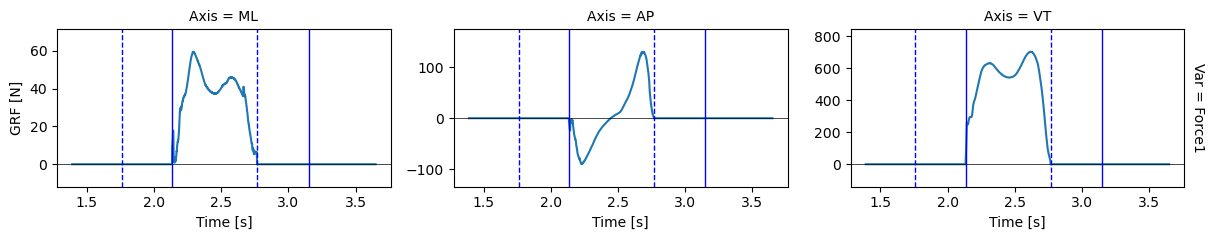

In [59]:
g = read_c3d_xr.plot(data)

In [60]:
data = read_c3d_xr.read_c3d(fname, var='ANGLE', prm=prm)
data

<xarray.DataArray 'Angle' (Time: 226, Var: 35, Axis: 3)> Size: 190kB
array([[[          nan,           nan,           nan],
        [          nan,           nan,           nan],
        [          nan,           nan,           nan],
        ...,
        [          nan,           nan,           nan],
        [          nan,           nan,           nan],
        [          nan,           nan,           nan]],

       [[          nan,           nan,           nan],
        [          nan,           nan,           nan],
        [          nan,           nan,           nan],
        ...,
        [          nan,           nan,           nan],
        [          nan,           nan,           nan],
        [          nan,           nan,           nan]],

       [[  14.4248848 ,   -8.62601376,  -10.33489037],
        [  54.15332794,    6.45207357,   16.46287727],
        [   9.91990471,    0.        ,    0.        ],
        ...,
...
        ...,
        [  17.52371788,    7.49655104,  -18.09986115],
        [-108.34094238,   -0.63255185,  -15.73986721],
        [ -92.8125    ,   -1.44933248,  -13.72204685]],

       [[  17.73306465,   -5.42647886,  -15.43292809],
        [   3.06485581,    6.06223917,    9.53591824],
        [   3.17967653,    0.        ,    0.        ],
        ...,
        [  18.06640625,    7.64276218,  -17.76106262],
        [-109.5436554 ,   -0.64768541,  -15.36848736],
        [ -92.56975555,   -1.7846967 ,  -13.71552944]],

       [[  18.11701012,   -5.43553305,  -18.08478546],
        [   2.92278743,    5.99130678,    9.48831272],
        [   3.2910955 ,    0.        ,    0.        ],
        ...,
        [  18.58939743,    7.81155252,  -17.54213905],
        [-110.39550781,   -0.6629566 ,  -15.21168995],
        [ -92.28240204,   -2.1036613 ,  -13.68212223]]])
Coordinates:
  * Time     (Time) float64 2kB 1.39 1.4 1.41 1.42 1.43 ... 3.61 3.62 3.63 3.64
  * Var      (Var) <U13 2kB 'LHip' 'LKnee' 'LAbsAnkle' ... 'RANA' 'LFTA' 'RFTA'
  * Axis     (Axis) <U2 24B 'ML' 'AP' 'VT'
Attributes: (12/15)
    units:          deg
    filename:       S_S02_T00_2
    mass:           67.0
    height:         1.58
    LL:             {'L': np.float64(0.809), 'R': np.float64(0.809)}
    FL:             {'L': np.float64(0.185), 'R': np.float64(0.184)}
    ...             ...
    events:         {'0': [np.float64(1.76), 'RFO'], '1': [np.float64(3.15), ...
    Cadence:        118.11
    Walking Speed:  1.167
    Stride Time:    1.016
    Foot Off:       62.205
    Stride Length:  1.186

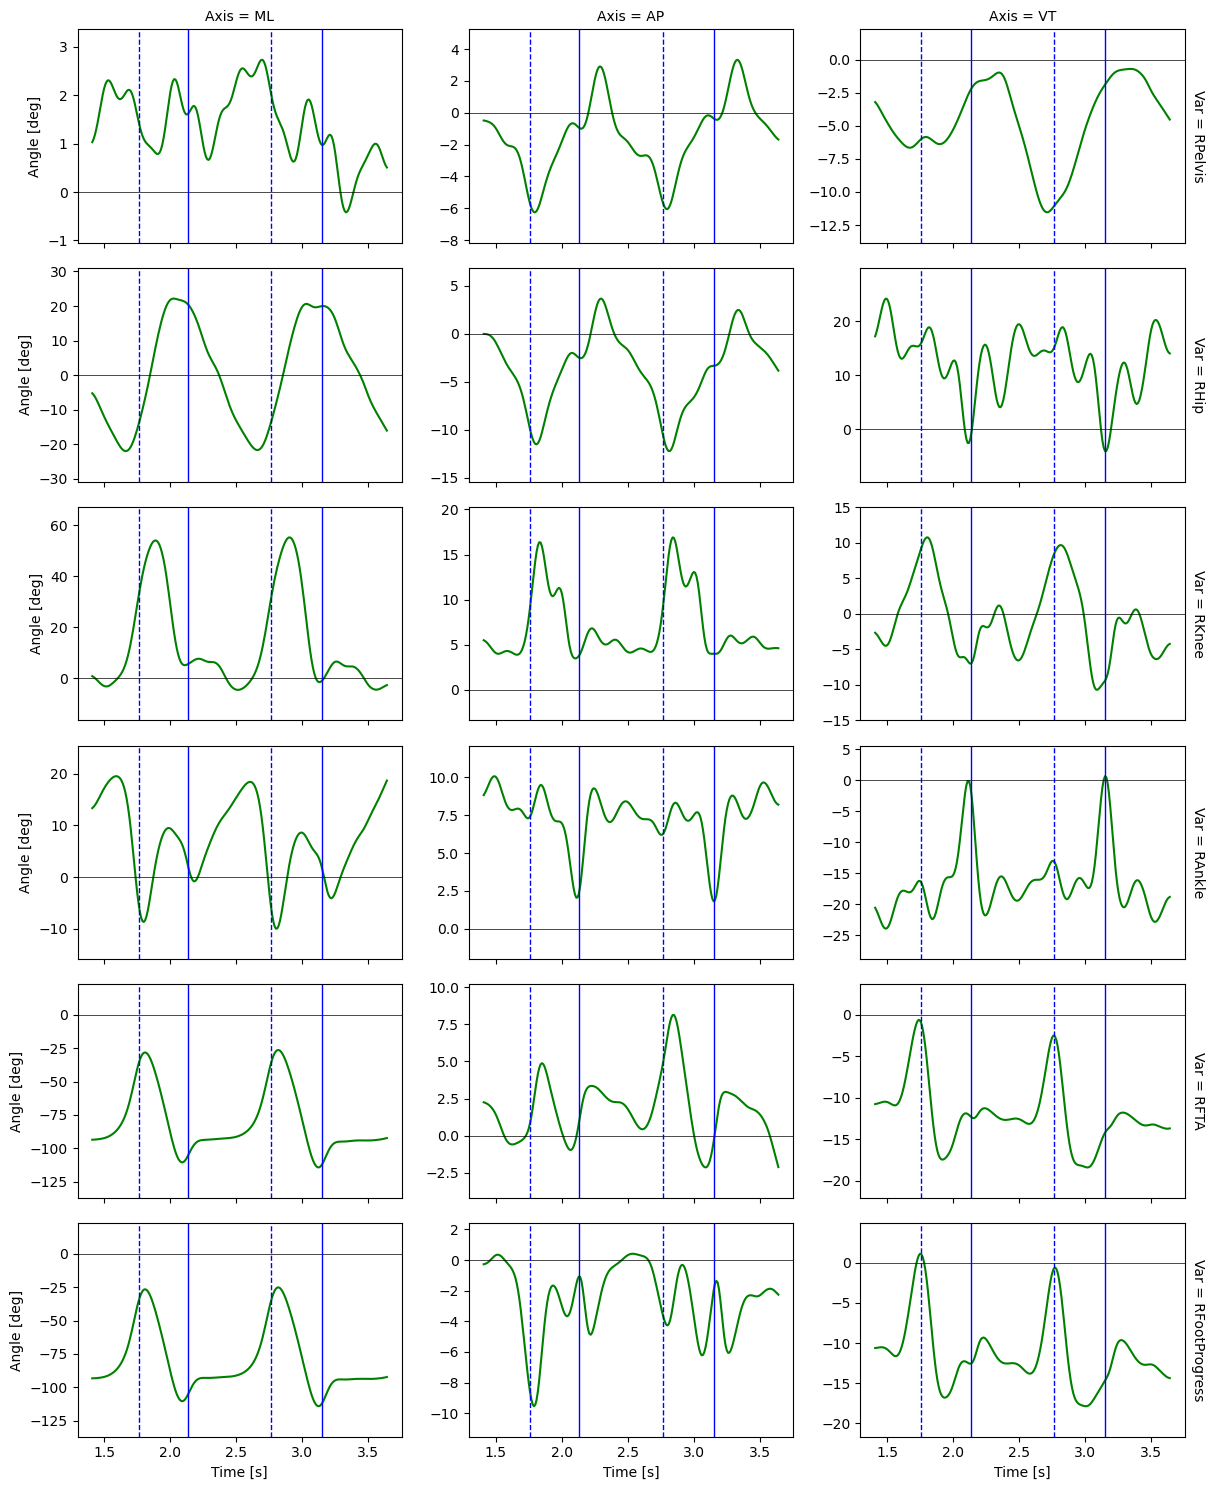

In [62]:
v = [data.Time.attrs['side'] + ang for ang in ['Pelvis', 'Hip', 'Knee', 'Ankle', 'FTA', 'FootProgress']]
g = data.sel(Var=v).plot.line(x='Time', row='Var', col='Axis', sharey=False,
                               color='g', size=2.5, aspect=1.5)
read_c3d_xr.plot_lines(g.axs, data.Time.attrs['events'], show=True)

In [32]:
data = read_c3d_xr.read_c3d(fname, var='MOMENT', prm=prm)
data

<xarray.DataArray 'Moment' (Time: 219, Var: 7, Axis: 3)> Size: 37kB
array([[[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]])
Coordinates:
  * Time     (Time) float64 2kB 0.42 0.43 0.44 0.45 0.46 ... 2.57 2.58 2.59 2.6
  * Var      (Var) <U15 420B 'LGroundReaction' 'LAnkle' ... 'RHip' 'LHip'
  * Axis     (Axis) <U2 24B 'ML' 'AP' 'VT'
Attributes: (12/15)
    units:          Nm
    filename:       S_S02_T00_5
    mass:           67.0
    height:         1.58
    LL:             {'L': np.float64(0.809), 'R': np.float64(0.809)}
    FL:             {'L': np.float64(0.185), 'R': np.float64(0.184)}
    ...             ...
    events:         {'0': [np.float64(0.83), 'LFO'], '1': [np.float64(2.24), ...
    Cadence:        119.522
    Walking Speed:  1.233
    Stride Time:    1.004
    Foot Off:       61.255
    Stride Length:  1.238

In [33]:
data.Var.values.tolist()

['LGroundReaction', 'LAnkle', 'RAnkle', 'RKnee', 'LKnee', 'RHip', 'LHip']

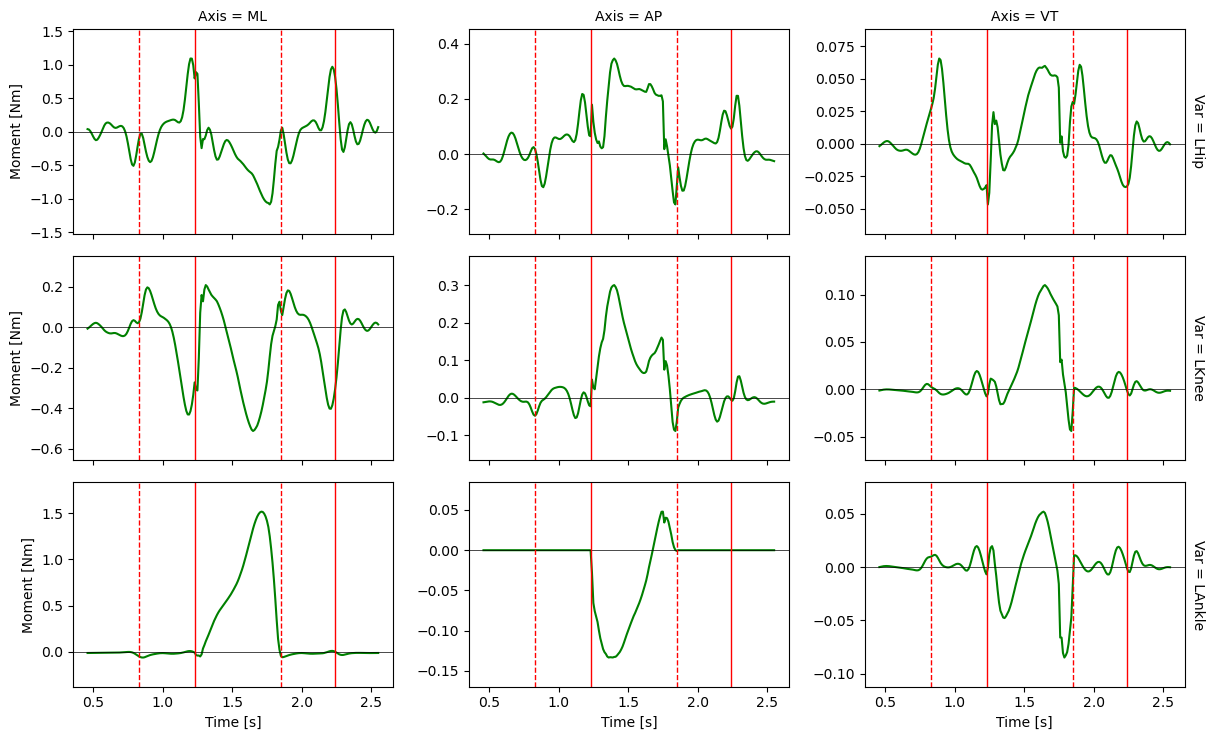

In [34]:
v = [data.Time.attrs['side'] + ang for ang in ['Hip', 'Knee', 'Ankle']]
g = data.sel(Var=v).plot.line(x='Time', row='Var', col='Axis', sharey=False,
                              color='g', size=2.5, aspect=1.5)
read_c3d_xr.plot_lines(g.axs, data.Time.attrs['events'], show=True)

In [35]:
data = read_c3d_xr.read_c3d(fname, var='POWER', prm=prm)
data

<xarray.DataArray 'Power' (Time: 219, Var: 6, Axis: 3)> Size: 32kB
array([[[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],
...
       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]])
Coordinates:
  * Time     (Time) float64 2kB 0.42 0.43 0.44 0.45 0.46 ... 2.57 2.58 2.59 2.6
  * Var      (Var) <U6 144B 'LHip' 'LKnee' 'LAnkle' 'RHip' 'RKnee' 'RAnkle'
  * Axis     (Axis) <U2 24B 'ML' 'AP' 'VT'
Attributes: (12/15)
    units:          W
    filename:       S_S02_T00_5
    mass:           67.0
    height:         1.58
    LL:             {'L': np.float64(0.809), 'R': np.float64(0.809)}
    FL:             {'L': np.float64(0.185), 'R': np.float64(0.184)}
    ...             ...
    events:         {'0': [np.float64(0.83), 'LFO'], '1': [np.float64(2.24), ...
    Cadence:        119.522
    Walking Speed:  1.233
    Stride Time:    1.004
    Foot Off:       61.255
    Stride Length:  1.238

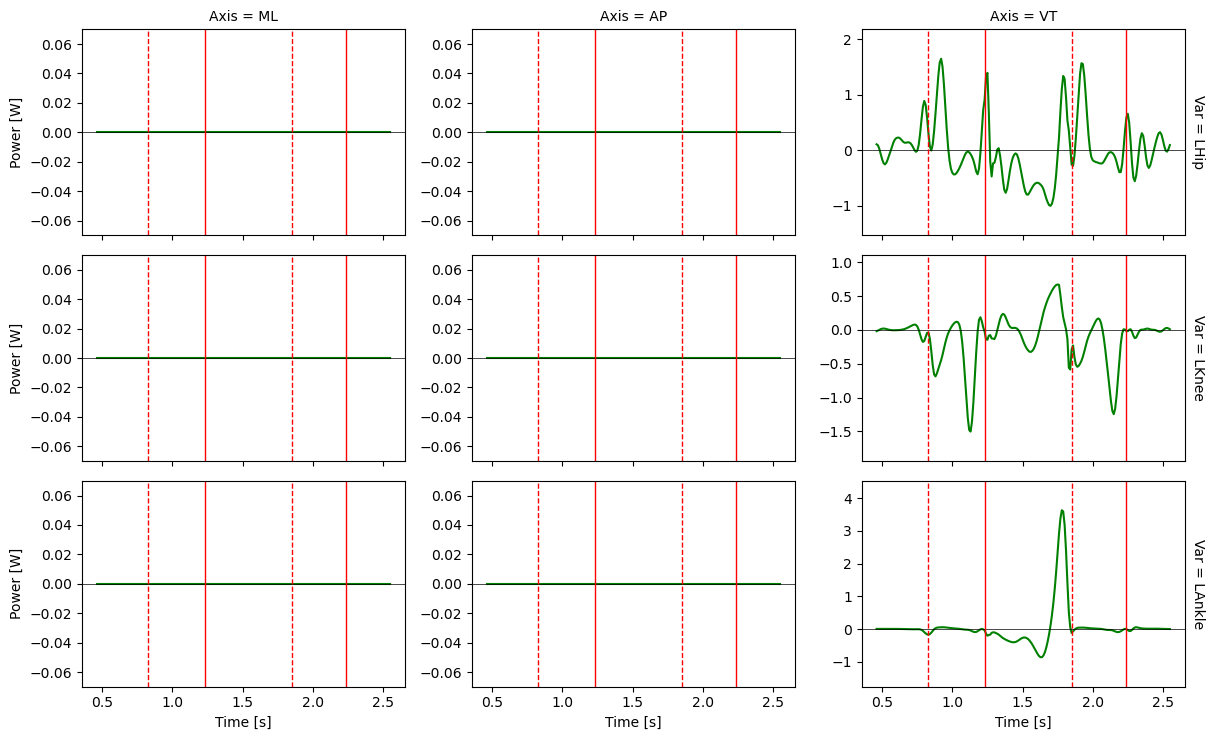

In [37]:
v = [data.Time.attrs['side'] + ang for ang in ['Hip', 'Knee', 'Ankle']]
g = data.sel(Var=v).plot.line(x='Time', row='Var', col='Axis', sharey=False,
                              color='g', size=2.5, aspect=1.5)
read_c3d_xr.plot_lines(g.axs, data.Time.attrs['events'], show=True)

In [38]:
data = read_c3d_xr.read_c3d(fname, var='OXFORD', prm=prm)
data

<xarray.DataArray 'Oxford' (Time: 219, Var: 8, Axis: 3)> Size: 42kB
array([[[ 1.64832711e+00, -1.84159584e+01, -1.12071486e+01],
        [ 5.85220003e+00, -4.43753672e+00,  3.20841289e+00],
        [ 8.73340797e+00, -2.15053978e+01, -1.01940765e+01],
        ...,
        [-1.97833800e+00,  1.59797525e+00,  2.38939285e+00],
        [-9.26373959e+00, -2.03550186e+01,  7.02722311e+00],
        [ 7.85644913e+00,  1.96835003e-02, -1.01053438e+01]],

       [[ 1.92373562e+00, -1.84296837e+01, -1.11984224e+01],
        [ 5.87755728e+00, -4.42142010e+00,  3.15827417e+00],
        [ 9.03142262e+00, -2.14985027e+01, -1.02434664e+01],
        ...,
        [-1.70980585e+00,  1.53511095e+00,  2.52365041e+00],
        [-7.74298525e+00, -1.98005962e+01,  6.35820389e+00],
        [ 7.83019876e+00,  1.98139362e-02, -1.06417360e+01]],

       [[ 2.24722147e+00, -1.85285587e+01, -1.11969862e+01],
        [ 5.91958332e+00, -4.40595198e+00,  3.10314226e+00],
        [ 9.39963245e+00, -2.15720139e+01, -1.03217726e+01],
        ...,
...
        ...,
        [-1.53967667e+00,  1.02553964e+00,  1.51893306e+00],
        [ 2.17860508e+00, -1.35910063e+01, -7.50770092e-01],
        [ 1.80602760e+01,  1.82925701e-02, -1.73257904e+01]],

       [[ 1.46417129e+00, -2.14050350e+01, -1.12716131e+01],
        [ 7.15656137e+00, -4.10150814e+00,  2.79102087e+00],
        [ 1.00039062e+01, -2.38210144e+01, -1.15134916e+01],
        ...,
        [-1.53608894e+00,  1.02790797e+00,  1.51604104e+00],
        [ 2.19928193e+00, -1.35905542e+01, -7.60142267e-01],
        [ 1.80793419e+01,  1.82843819e-02, -1.73258343e+01]],

       [[            nan,             nan,             nan],
        [            nan,             nan,             nan],
        [            nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan],
        [            nan,             nan,             nan],
        [            nan,             nan,             nan]]])
Coordinates:
  * Time     (Time) float64 2kB 0.42 0.43 0.44 0.45 0.46 ... 2.57 2.58 2.59 2.6
  * Var      (Var) <U6 192B 'LHFTBA' 'LFFHFA' 'LFFTBA' ... 'RFFTBA' 'RHXFFA'
  * Axis     (Axis) <U2 24B 'ML' 'AP' 'VT'
Attributes: (12/15)
    units:          deg
    filename:       S_S02_T00_5
    mass:           67.0
    height:         1.58
    LL:             {'L': np.float64(0.809), 'R': np.float64(0.809)}
    FL:             {'L': np.float64(0.185), 'R': np.float64(0.184)}
    ...             ...
    events:         {'0': [np.float64(0.83), 'LFO'], '1': [np.float64(2.24), ...
    Cadence:        119.522
    Walking Speed:  1.233
    Stride Time:    1.004
    Foot Off:       61.255
    Stride Length:  1.238

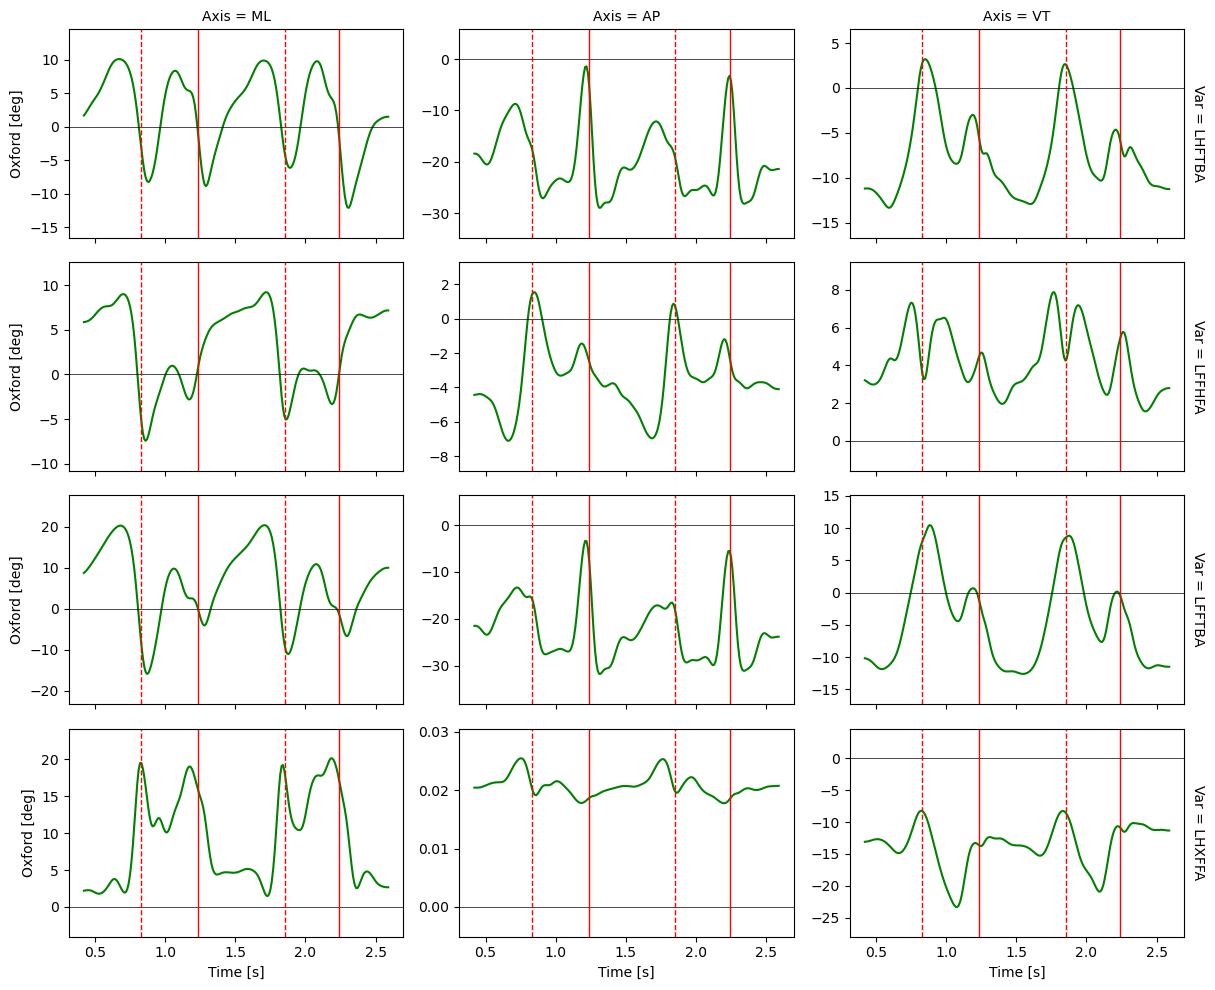

In [39]:
v = [data.Time.attrs['side'] + ang for ang in ['HFTBA', 'FFHFA', 'FFTBA', 'HXFFA']]
g = data.sel(Var=v).plot.line(x='Time', row='Var', col='Axis', sharey=False,
                              color='g', size=2.5, aspect=1.5)
read_c3d_xr.plot_lines(g.axs, data.Time.attrs['events'], show=True)